Initialization

In [ ]:
import serial

# Set Port Number
port_number = "COM3"

# Debug Mode On or Off
debugmode = "on"

# Set Number of Psuedoclocks
numofclocks = 4



ser = serial.Serial(port=port_number,baudrate=115200,timeout=1)
debug = f'debug {debugmode}\r\n'.encode()
setnumofclocks = b'setnumpseudoclocks %d\r\n' % numofclocks
ser.write(debug)
ser.write(setnumofclocks)

response = ser.read(100)

print(response.decode(errors="ignore"))

ser.close()

Get Frequency

In [ ]:
ser = serial.Serial(port=port_number,baudrate=115200,timeout=1)

ser.write(b'getfreqs\r\n')

response = ser.read(100)

print(response.decode(errors="ignore"))

ser.close()

Get Voltage

In [ ]:
ser = serial.Serial(port=port_number,baudrate=115200,timeout=1)

ser.write(b'getvolts\r\n')

response = ser.read(100)

print(response.decode(errors="ignore"))

ser.close()

Set Frequency

In [ ]:
# 0 - internal reference frequency; 1 - external reference frequency
mode = 0

# Set Frequency in MHZ
frequencyMHZ = 200


MHZ = 1000000
freqHZ = MHZ*frequencyMHZ

ser = serial.Serial(port=port_number,baudrate=115200,timeout=1)
setfrequency = b'setclock %d %d\r\n' % (mode, freqHZ)
ser.write(setfrequency)

response = ser.read(100)

print(response.decode(errors="ignore"))

ser.close()

Set Instructions for Psuedoclock

In [ ]:
# Set Psuedoclock (0 - 3)
psuedoclock = 0

# Beginning Address (0 indexed)
baddr = 0

# Ending Address
eaddr = 1

# Stop Address (Set Equal to the last Ending Address)
saddr = 1

# Set Half-period (5 - 2^32)
halfperiod = 30

# Set Repetitions (0 - 2^32)
reps = 10000

ser = serial.Serial(port=port_number,baudrate=115200,timeout=1)
for i in range(baddr,eaddr):
    instructions = b'set %d %d %d %d\r\n' % (psuedoclock,i,halfperiod,reps)
    ser.write(instructions)
stopf = b'set %d %d 0 0\r\n' % (psuedoclock,saddr)
ser.write(stopf)

response = ser.read(50)

print(response.decode(errors="ignore"))

ser.close()

Run Test

In [ ]:
ser = serial.Serial(port=port_number,baudrate=115200,timeout=1)

ser.write(b'start\r\n')

response = ser.read(1000)

print(response.decode(errors="ignore"))

ser.close()

# **Notes on Pico 2**

## Frequency Stability

Test different # of reps in order to determine frequency in the long run. We will use 100Mhz as a reference and hope that 200Mhz performs the same or better in terms of stability. The tests will be run on all 4 psuedoclocks at a half-period of 30 cycles since it is one of the lowest half-periods both 100Mhz and 200Mhz is detectable on the time tagger. In these tests, all 4 psuedoclocks produce almost identical charts. Variations occur from unequal start and stop measurement times for each channel. 

The graphs below are Allan graphs measuring different noises. A negative slope represents white noise, which gets reduced over larger averaging times. A neutral slope represents flicker noise, which is neither reduced or increased over longer averaging times. A positive slope represents random walk, which means noise is increasing over longer averaging times. A negative slope is ideal because it shows that noise is reduced and the frequency stabilizes over time.

## Benchmark 100Mhz

### Test 1: 100 Mhz; 4 psuedoclocks; 10,000 reps each; 30 half-period; 

##### Result 1 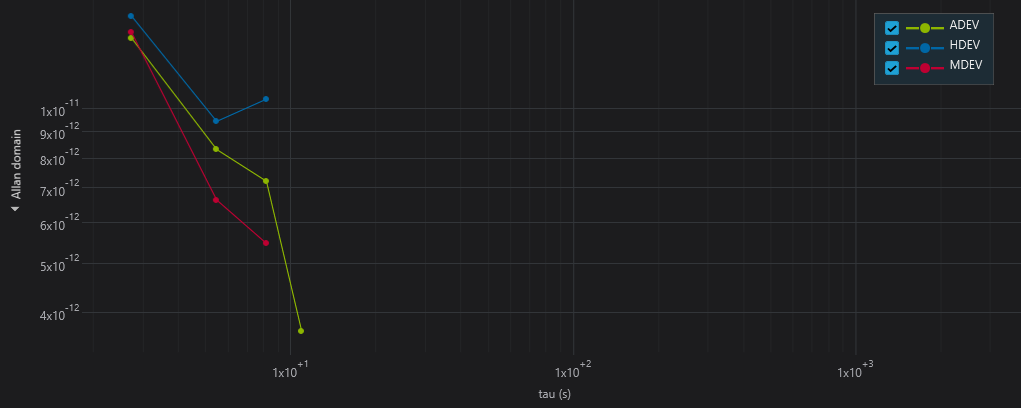
##### Result 2 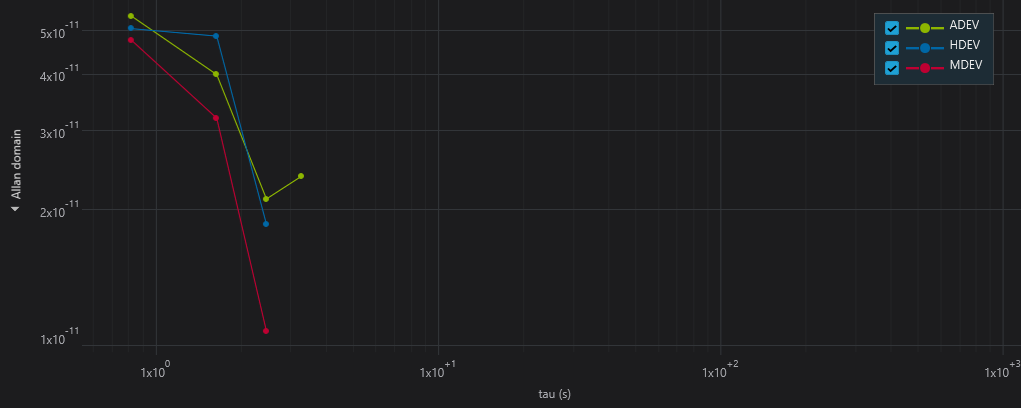
##### Result 3 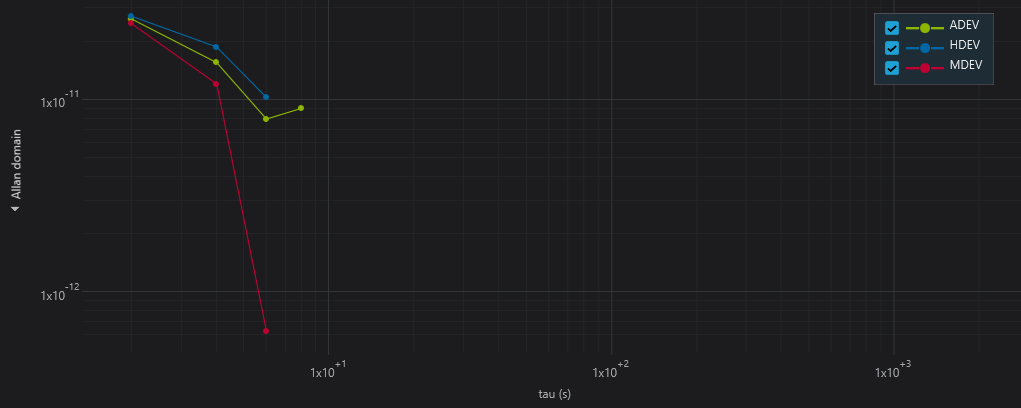

### Test 2: 100 Mhz; 4 psuedoclocks; 50,000 reps each; 30 half-period; 

##### Result 1 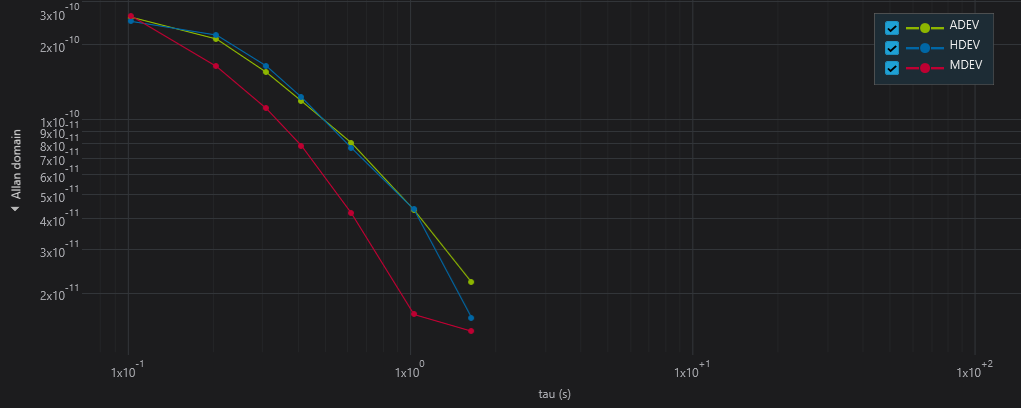
##### Result 2 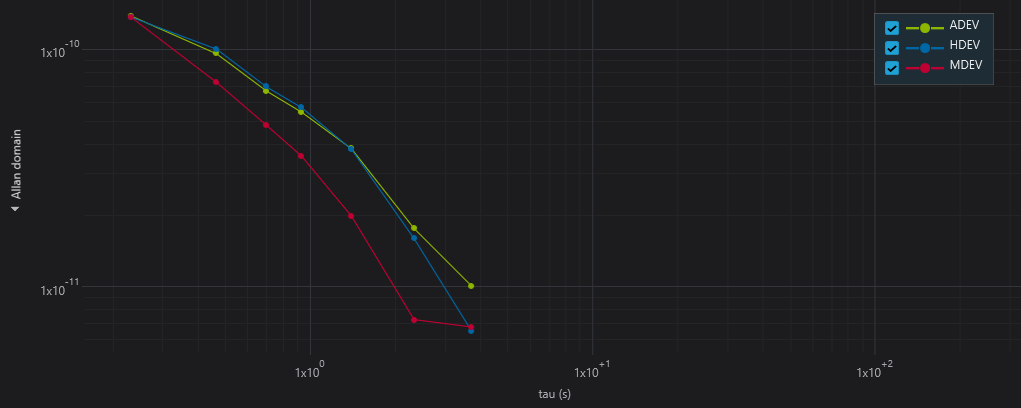
##### Result 3 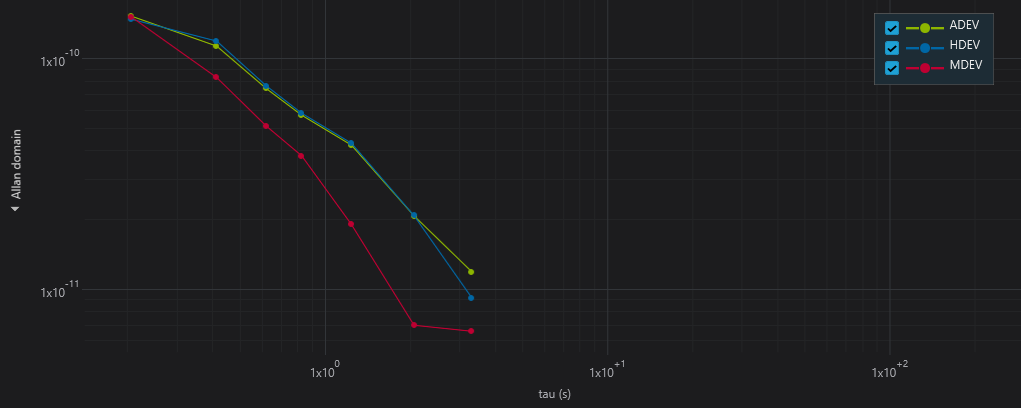

### Test 3: 100 Mhz; 4 psuedoclocks; 200,000 reps each; 30 half-period; 

##### Result 1 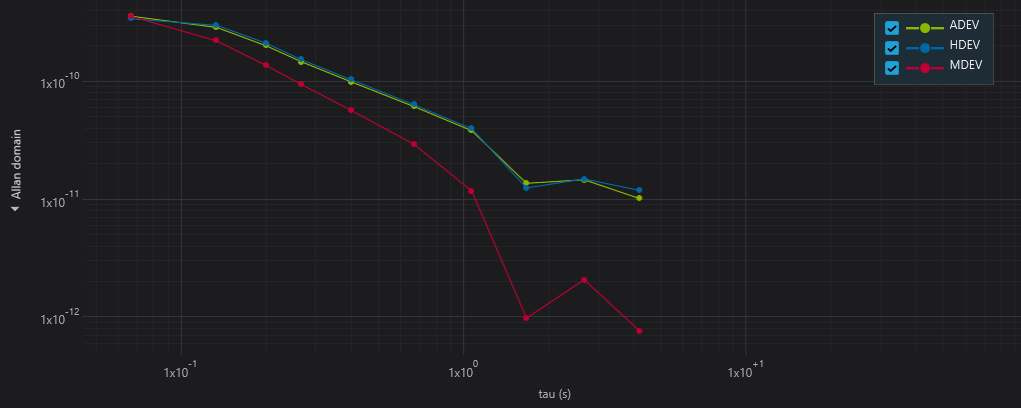
##### Result 2 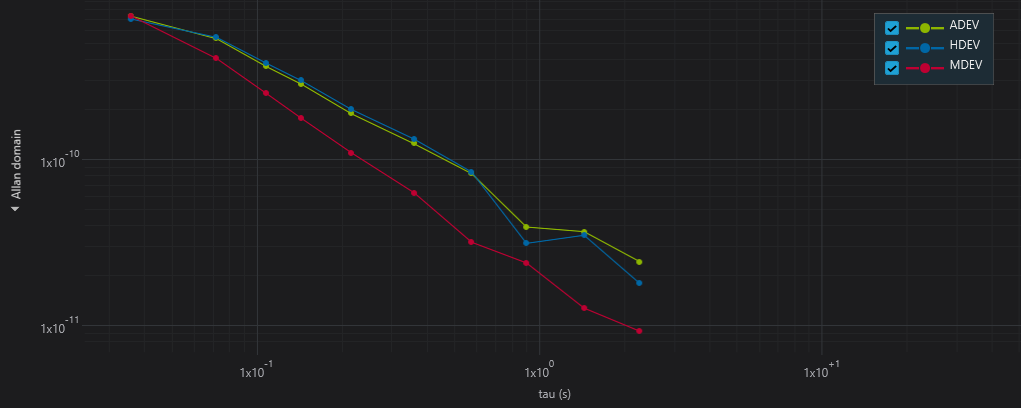
##### Result 3 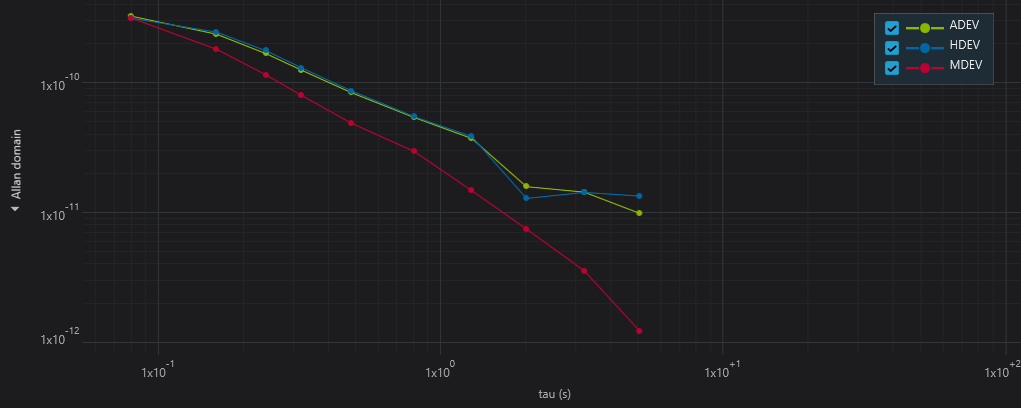

### Test 4: 100 Mhz; 4 psuedoclocks; 1,000,000 reps each; 30 half-period; 

##### Result 1 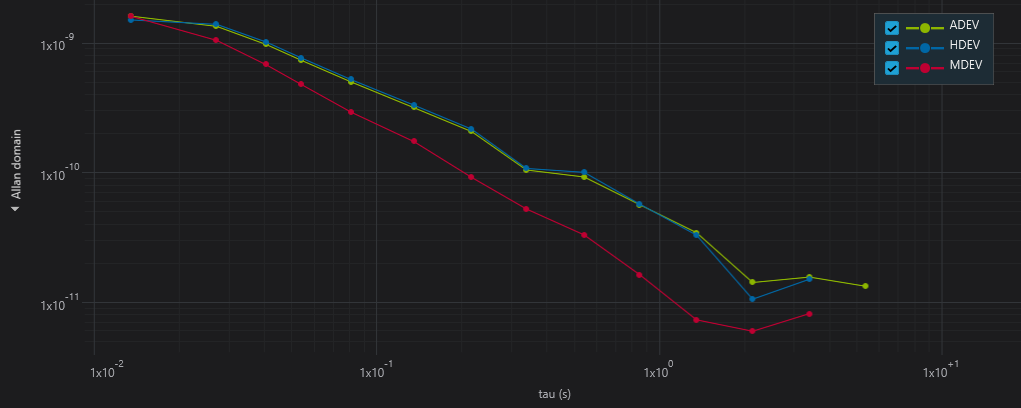
##### Result 2 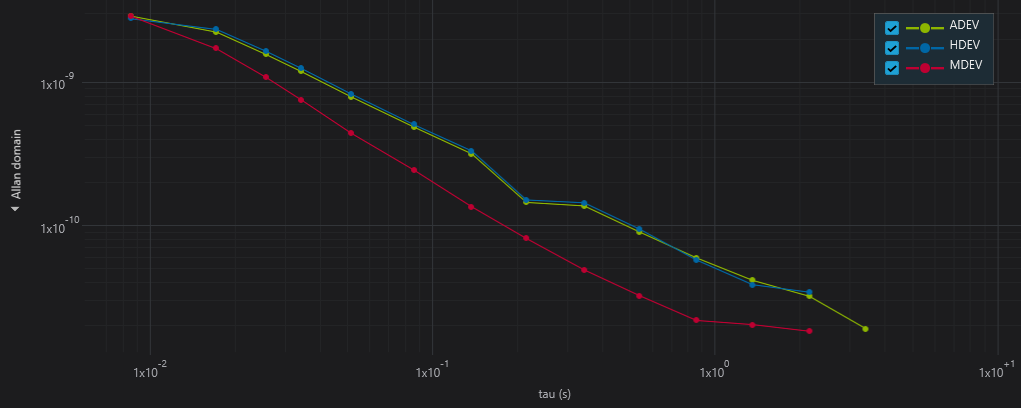
##### Result 3 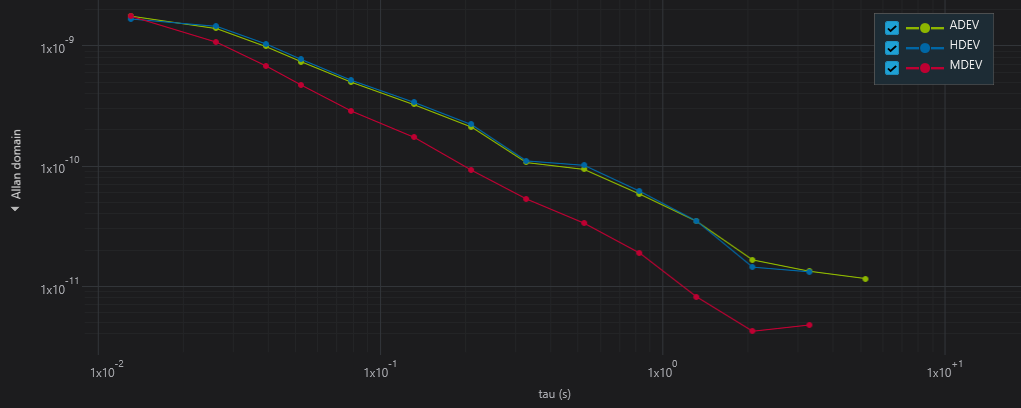

### Test 5: 100 Mhz; 4 psuedoclocks; 5,000,000 reps each; 30 half-period; 

##### Result 1 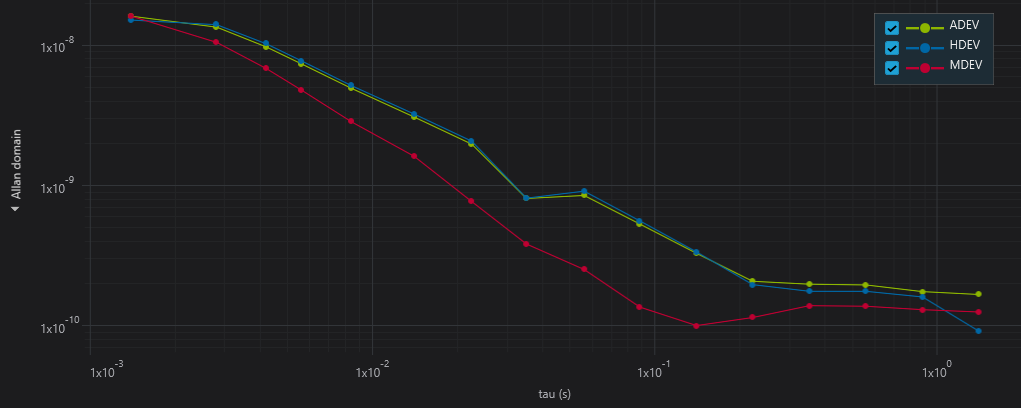
##### Result 2 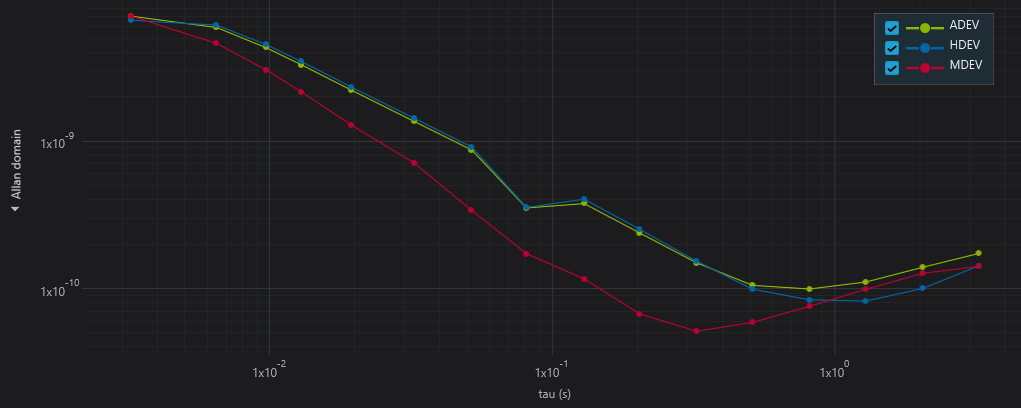
##### Result 3 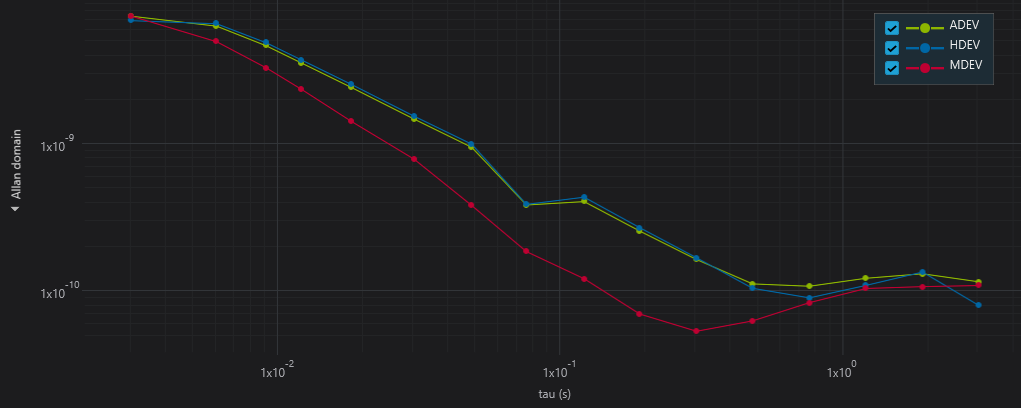

### Test 6: 100 Mhz; 4 psuedoclocks; 20,000,000 reps each; 30 half-period; 

##### Result 1 ![alt text](run1.png)
##### Result 2 ![alt text](run2.png)
##### Result 3 ![alt text](run3-2.png)

### Test 7: 100 Mhz; 4 psuedoclocks; 100,000,000 reps each; 30 half-period; 

##### Result 1 ![alt text](run1-1.png)
##### Result 2 ![alt text](run2-1.png)
##### Result 3 ![alt text](run3-3.png)

# Benchmark 200Mhz

### Test 1: 200 Mhz; 4 psuedoclocks; 10,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-2.png)
##### Result 2 ![alt text](run2-2.png)
##### Result 3 ![alt text](run3-4.png)

### Test 2: 200 Mhz; 4 psuedoclocks; 50,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-3.png)
##### Result 2 ![alt text](run2-3.png)
##### Result 3 ![alt text](run3-5.png)

### Test 3: 200 Mhz; 4 psuedoclocks; 200,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-4.png)
##### Result 2 ![alt text](run2-4.png)
##### Result 3 ![alt text](run3-6.png)

### Test 4: 200 Mhz; 4 psuedoclocks; 1,000,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-5.png)
##### Result 2 ![alt text](run2-5.png)
##### Result 3 ![alt text](run3-7.png)

### Test 5: 200 Mhz; 4 psuedoclocks; 5,000,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-6.png)
##### Result 2 ![alt text](run2-6.png)
##### Result 3 ![alt text](run3-8.png)

### Test 6: 200 Mhz; 4 psuedoclocks; 20,000,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-7.png)
##### Result 2 ![alt text](run2-7.png)
##### Result 3 ![alt text](run3-9.png)

### Test 7: 200 Mhz; 4 psuedoclocks; 100,000,000 reps each; 30 half-period;

##### Result 1 ![alt text](run1-8.png)
##### Result 2 ![alt text](run2-8.png)
##### Result 3 ![alt text](run3-10.png)